<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221102_1_Chap19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [ ]:
autoencoder = models.Sequential()

#encoder
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu', strides=2)) # 2칸씩

#decoder
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
autoencoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_73 (Conv2D)          (None, 4, 4, 8)         

In [ ]:
# 컴파일 및 학습
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 28s 59ms/step - loss: 0.2067 - val_loss: 0.1357
Epoch 2/50
469/469 [==============================] - 20s 44ms/step - loss: 0.1260 - val_loss: 0.1176
Epoch 3/50
469/469 [==============================] - 23s 50ms/step - loss: 0.1148 - val_loss: 0.1101
Epoch 4/50
469/469 [==============================] - 22s 47ms/step - loss: 0.1089 - val_loss: 0.1054
Epoch 5/50
469/469 [==============================] - 24s 51ms/step - loss: 0.1047 - val_loss: 0.1018
Epoch 6/50
469/469 [==============================] - 25s 53ms/step - loss: 0.1017 - val_loss: 0.0991
Epoch 7/50
469/469 [==============================] - 24s 50ms/step - loss: 0.0992 - val_loss: 0.0980
Epoch 8/50
469/469 [==============================] - 23s 49ms/step - loss: 0.0972 - val_loss: 0.0952
Epoch 9/50
469/469 [==============================] - 23s 48ms/step - loss: 0.0957 - val_loss: 0.0938
Epoch 10/50
469/469 [==============================] - 22s 47ms/step - loss: 0.094

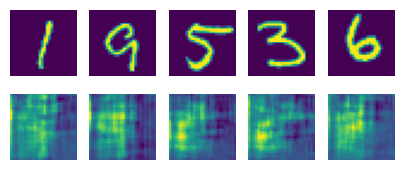

In [ ]:
# 학습 결과 출력
random_test = np.random.randint(X_test.shape[0], size=5)
# 테스트 이미지 랜덤 호출
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 넣기
plt.figure(figsize=(7,2)) # 출력 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):
    #랜덤으로 뽑은 이미지를 차례로 나열합니다.
    ax = plt.subplot(2, 7, i+1)
    #테스트할 이미지를 먼저 그대로 보여줍니다.
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    #오토인코딩 결과를 다음 열에 입력합니다.
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()